# Train VAE for task2

This notebook trains a VAE model for task 2.

In [1]:
# public modules
from dlcliche.notebook import *
from dlcliche.utils import (
    sys, random, Path, np, plt, EasyDict,
    ensure_folder, deterministic_everything,
)
from argparse import Namespace

# private modules
sys.path.append('..')
import common as com

from pytorch_common import (
    Task2Lightning, torch, pl, VAE_loss_function
)

# loading parameters -> hparams (argparse compatible)
params = EasyDict(com.yaml_load('config.yaml'))

# create working directory
ensure_folder(params.model_directory)

# test directories
dirs = com.select_dirs(param=params, mode='development')

# fix random seeds
deterministic_everything(2020, pytorch=True)

# PyTorch device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

2020-03-14 16:53:19,258 - INFO - load_directory <- development


In [2]:
%load_ext tensorboard
%tensorboard --logdir lightning_logs/

Reusing TensorBoard on port 6006 (pid 5305), started 3 days, 5:59:20 ago. (Use '!kill 5305' to kill it.)

In [7]:
# VAE Training class

class Task2VAELightning(Task2Lightning):
    """Task2 PyTorch Lightning class, for training VAE only."""

    def __init__(self, device, params, files, mode='baseline', normalize=False,
                 reconst_loss='mse', a_RECONST=1., a_KLD=1., **model_kwargs):
        super().__init__(device, params, files, mode='vae', normalize=True, **model_kwargs)
        self.reconst_loss = reconst_loss
        self.a_RECONST = a_RECONST
        self.a_KLD = a_KLD

    def training_step(self, batch, batch_nb):
        x, y = batch
        y_hat, z, mu, logvar = self.model.forward_all(x)
        loss = VAE_loss_function(recon_x=y_hat, x=x, mu=mu, logvar=logvar,
                                 reconst_loss=self.reconst_loss,
                                 a_RECONST=self.a_RECONST, a_KLD=self.a_KLD)
        tensorboard_logs = {'train_loss': loss}
        return {'loss': loss, 'log': tensorboard_logs}


# train models

for target_dir in dirs:
    target = str(target_dir).split('/')[-1]
    print(f'==== Start training [{target}] with {torch.cuda.device_count()} GPU(s). ====')

    files = com.file_list_generator(target_dir)

    task2 = Task2VAELightning(device, params, files, summary=(target == 'ToyCar'),
                              reconst_loss='mse',
                              a_RECONST=1.,
                              a_KLD=.01)
    trainer = pl.Trainer(max_epochs=params.fit.epochs, gpus=torch.cuda.device_count())
    trainer.fit(task2)
    
    model_file = f'{params.model_directory}/model_{target}.pth'
    torch.save(task2.model.state_dict(), model_file)
    print(f'saved {model_file}.\n')

2020-03-14 16:30:24,065 - INFO - target_dir : dev_data/ToyCar
2020-03-14 16:30:24,075 - INFO - # of training samples : 4000
2020-03-14 16:30:24,163 - INFO - Loading cached __cache_ToyCar_val.npy


==== Start training [ToyCar] with 1 GPU(s). ====
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 400]         256,400
            Linear-2                  [-1, 400]         160,400
            Linear-3                   [-1, 20]           8,020
            Linear-4                   [-1, 20]           8,020
            Linear-5                  [-1, 400]           8,400
            Linear-6                  [-1, 400]         160,400
            Linear-7                  [-1, 640]         256,640
Total params: 858,280
Trainable params: 858,280
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 3.27
Estimated Total Size (MB): 3.29
----------------------------------------------------------------


2020-03-14 16:30:25,192 - INFO - Loading cached __cache_ToyCar_train.npy
2020-03-14 16:30:37,161 - INFO - Loading cached __cache_ToyCar_val.npy


2020-03-14 16:31:23,560 - INFO - target_dir : dev_data/ToyConveyor
2020-03-14 16:31:23,569 - INFO - # of training samples : 3000
2020-03-14 16:31:23,614 - INFO - Loading cached __cache_ToyConveyor_val.npy



saved ./model/model_ToyCar.pth.

==== Start training [ToyConveyor] with 1 GPU(s). ====


2020-03-14 16:31:24,400 - INFO - Loading cached __cache_ToyConveyor_train.npy
2020-03-14 16:31:29,171 - INFO - Loading cached __cache_ToyConveyor_val.npy


2020-03-14 16:32:00,661 - INFO - target_dir : dev_data/fan
2020-03-14 16:32:00,669 - INFO - # of training samples : 3675
2020-03-14 16:32:00,714 - INFO - Loading cached __cache_fan_val.npy



saved ./model/model_ToyConveyor.pth.

==== Start training [fan] with 1 GPU(s). ====


2020-03-14 16:32:01,636 - INFO - Loading cached __cache_fan_train.npy
2020-03-14 16:32:09,665 - INFO - Loading cached __cache_fan_val.npy


2020-03-14 16:32:48,201 - INFO - target_dir : dev_data/pump
2020-03-14 16:32:48,208 - INFO - # of training samples : 3349
2020-03-14 16:32:48,252 - INFO - Loading cached __cache_pump_val.npy



saved ./model/model_fan.pth.

==== Start training [pump] with 1 GPU(s). ====


2020-03-14 16:32:49,196 - INFO - Loading cached __cache_pump_train.npy
2020-03-14 16:32:57,046 - INFO - Loading cached __cache_pump_val.npy


2020-03-14 16:33:32,064 - INFO - target_dir : dev_data/slider
2020-03-14 16:33:32,070 - INFO - # of training samples : 2804
2020-03-14 16:33:32,103 - INFO - Loading cached __cache_slider_val.npy



saved ./model/model_pump.pth.

==== Start training [slider] with 1 GPU(s). ====


2020-03-14 16:33:32,945 - INFO - Loading cached __cache_slider_train.npy
2020-03-14 16:33:36,953 - INFO - Loading cached __cache_slider_val.npy


2020-03-14 16:34:06,316 - INFO - target_dir : dev_data/valve
2020-03-14 16:34:06,322 - INFO - # of training samples : 3291
2020-03-14 16:34:06,362 - INFO - Loading cached __cache_valve_val.npy



saved ./model/model_slider.pth.

==== Start training [valve] with 1 GPU(s). ====


2020-03-14 16:34:07,165 - INFO - Loading cached __cache_valve_train.npy
2020-03-14 16:34:14,531 - INFO - Loading cached __cache_valve_val.npy



saved ./model/model_valve.pth.



## Visualize 

In [34]:
# Get one batch of samples from validation set, then get model prediction result.
dl = task2.val_dataloader()
x, y = next(iter(dl))
with torch.no_grad():
    yhat = task2.forward(x)

2020-03-14 13:26:52,861 - INFO - Loading cached ./model/__cache_ToyCar_val.npy


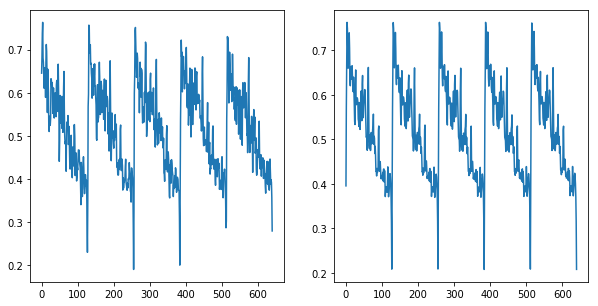

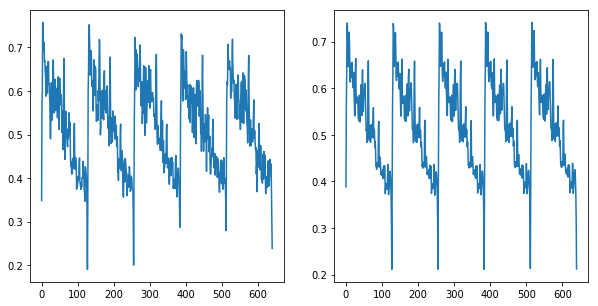

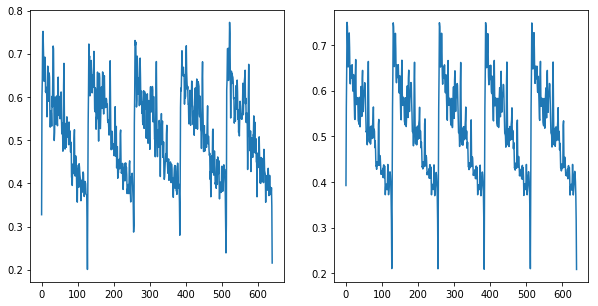

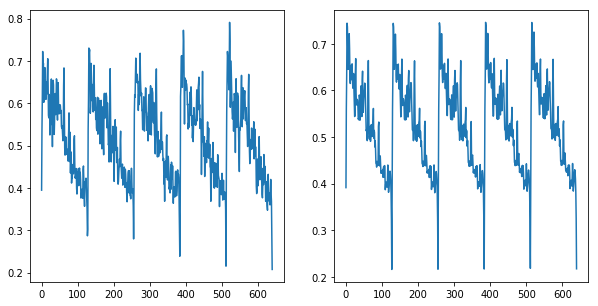

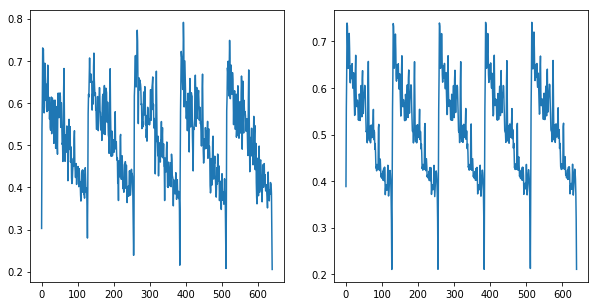

In [35]:
# Show 
for i in range(5):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    sample_idx = i
    axs[0].plot(x.cpu().numpy()[sample_idx][0]); axs[1].plot(yhat.cpu().numpy()[sample_idx]);
    plt.show()